In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 8

In [ ]:
# Загружаем Датасеты
# https://docs.google.com/spreadsheets/d/1ABaaInGbLjAaMwX3KdgpP-_QDkCn7n1d/edit?usp=sharing&ouid=102462001326798095568&rtpof=true&sd=true
!gdown --id 1ABaaInGbLjAaMwX3KdgpP-_QDkCn7n1d
!pip install -q xlrd
df = pd.read_excel("filtered_data.xlsx")
# https://docs.google.com/spreadsheets/d/1-3uZ6xivZ6Oo_6u-Ho-h3gsx6HRzr_E-/edit?usp=sharing&ouid=102462001326798095568&rtpof=true&sd=true
!gdown --id 1-3uZ6xivZ6Oo_6u-Ho-h3gsx6HRzr_E-
sk = pd.read_excel("skill_salary.xlsx")
# https://docs.google.com/spreadsheets/d/1-6CduQWv3d8S-vrC2A7pMHXfUj0JJN2i/edit?usp=sharing&ouid=102462001326798095568&rtpof=true&sd=true
!gdown --id 1-6CduQWv3d8S-vrC2A7pMHXfUj0JJN2i
sp = pd.read_excel("spec_salary.xlsx")

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ABaaInGbLjAaMwX3KdgpP-_QDkCn7n1d
To: /content/filtered_data.xlsx
100% 47.4M/47.4M [00:00<00:00, 69.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-3uZ6xivZ6Oo_6u-Ho-h3gsx6HRzr_E-
To: /content/skill_salary.xlsx
100% 5.00M/5.00M [00:00<00:00, 246MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading.

# 1. Структурируем данные

In [ ]:
df.sample()

,Столбец1,id,name,schedule,experience,region,salary_from,key_skills_list,specializations_list,description_list,city,date,requirement,responsibility
12380,20955,52437097,Специалист / Ведущий специалист по информацион...,'Полный день','Нет опыта',Москва,NaN,"['информационная безопасность', 'аудит безопас...","['компьютерная безопасность', 'сетевые техноло...",Род занятий: Реализация консалтинговых проекто...,Москва,2022-04-13,Опыт выполнения работ по аудиту и консалтингу ...,"Проведение аудитов ИБ, разработка рекомендаций..."


In [ ]:
dframe=df[['city','salary_from','schedule','experience','key_skills_list','specializations_list']]

In [ ]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49039 entries, 0 to 49038
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  49039 non-null  object 
 1   salary_from           20433 non-null  float64
 2   schedule              49039 non-null  object 
 3   experience            49039 non-null  object 
 4   key_skills_list       49039 non-null  object 
 5   specializations_list  49039 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.2+ MB


In [ ]:
dframe.tail()

,city,salary_from,schedule,experience,key_skills_list,specializations_list
49034,Тула,30000.0,'Полный день','Нет опыта',"['coreldraw', 'пользователь пк', 'графические ...","['игровое по', 'программирование', 'разработка..."
49035,Тула,40000.0,'Полный день','От 1 года до 3 лет',"['adobe photoshop', 'coreldraw', 'креативность...","['игровое по', 'программирование', 'разработка..."
49036,Тула,NaN,'Полный день','От 1 года до 3 лет',"['adobe photoshop', 'adobe illustrator', 'core...","['игровое по', 'программирование', 'разработка..."
49037,Тула,35000.0,'Полный день','От 1 года до 3 лет',"['adobe photoshop', 'adobe illustrator', 'core...","['игровое по', 'программирование', 'разработка..."
49038,Тула,NaN,'Полный день','Нет опыта',"['организаторские навыки', 'ведение переговоро...","['игровое по', 'программирование', 'разработка..."


In [ ]:
skills=sk[['key_skills_list','salary_from']]

In [ ]:
skills.sample()

,key_skills_list,salary_from
7371,mysql,85000.0


In [ ]:
spec=sp[['specializations_list','salary_from']]

In [ ]:
spec.tail()

,specializations_list,salary_from
200425,программирование,35000.0
200426,разработка,35000.0
200427,игровое по,NaN
200428,программирование,NaN
200429,разработка,NaN


# 2. Проанализируем типы данных

Типы данных для датасета **dframe**:

-   salary_from (Заработная плата "От..") - количественый, числовой, непрерывный
-   city (город) - качественный, категориальный, номинальный
-   schedule (график) - качественный, категориальный, номинальный. Но можно преобразовать в количественый, числовой, дискретный
-   experience (опыт работы) - качественный, категориальный, номинальный. Но можно преобразовать в количественый, числовой, дискретный
-   key_skills_list (ключевые навыки) - качественный, категориальный, номинальный
-   specializations_list (специализации) - качественный, категориальный, номинальный

# 3. Визуализация данных

## Гистограммы




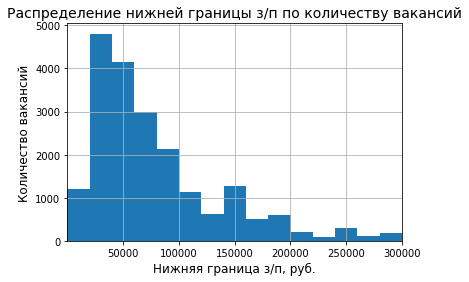

In [ ]:
dframe['salary_from'].hist(bins=50)
plt.xlim((1,300000))
plt.title("Распределение нижней границы з/п по количеству вакансий", fontsize = 14)
plt.ylabel('Количество вакансий', fontsize = 12) # Подпись оси Y
plt.xlabel('Нижняя граница з/п, руб.', fontsize = 12) # Подпись оси x
plt.show()

## Столбчатые диаграммы

In [ ]:
# Выделяем наиболее "значимые" по количеству вакансий города
cities=dframe['city'].value_counts()
other=cities[cities<500]
cities_edited=cities[cities>=500]
cities_edited['Прочие города']=other.sum()
city_vac_count = cities_edited.sort_values(ascending = False)

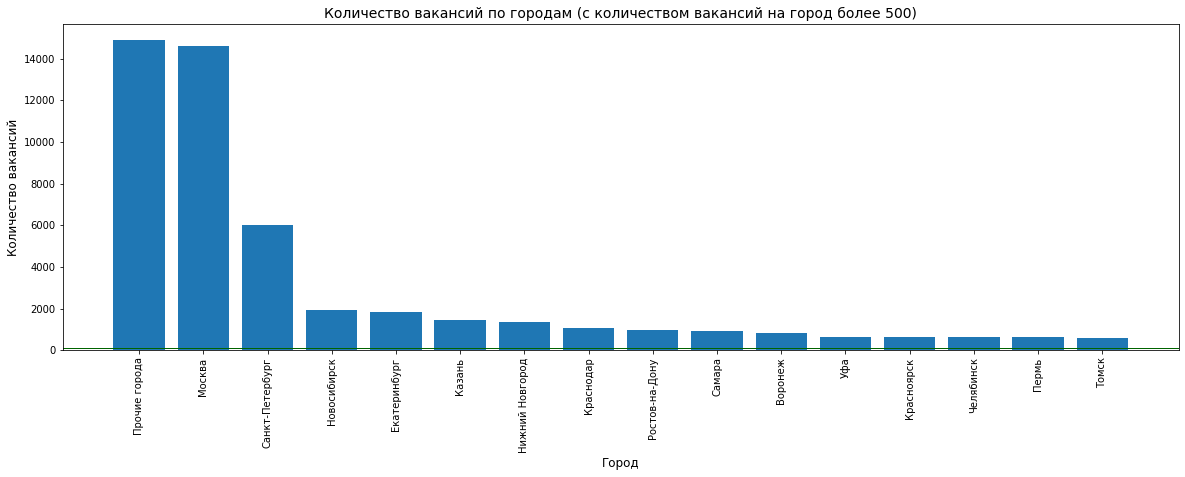

In [ ]:
# Строим диаграмму
fig = plt.figure(figsize = (20, 6))
plt.bar(city_vac_count.index,city_vac_count.values)

plt.title(label = "Количество вакансий по городам (с количеством вакансий на город более 500)", fontsize = 14)
plt.ylabel("Количество вакансий",  fontsize = 12)
plt.xlabel( "Город", size = 12)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов

plt.axhline( y=100, color = 'darkgreen', linewidth=1)
#plt.text(x=65, y=110,  s='100 вакансий', size=11, color='black')

plt.show()

In [ ]:
# Выделяем наиболее значимые навыки
skill_count = skills['key_skills_list'].value_counts()
skill_edited=skill_count[skill_count>=600]
skill_vac_count = skill_edited.sort_values(ascending = False)

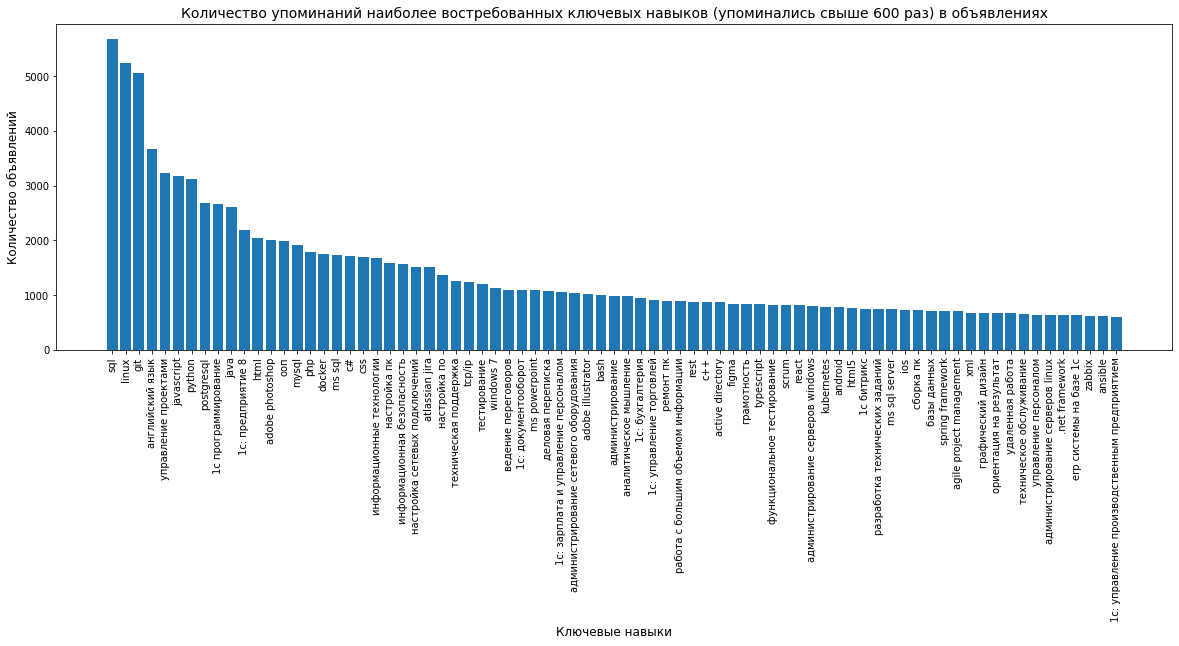

In [ ]:
# Строим диаграмму
fig = plt.figure(figsize = (20, 6))
plt.bar( skill_vac_count.index.astype('str'), skill_vac_count)

plt.title(label = "Количество упоминаний наиболее востребованных ключевых навыков (упоминались свыше 600 раз) в объявлениях", fontsize = 14)
plt.ylabel("Количество объявлений",  fontsize = 12)
plt.xlabel( "Ключевые навыки", size = 12)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов

plt.show()

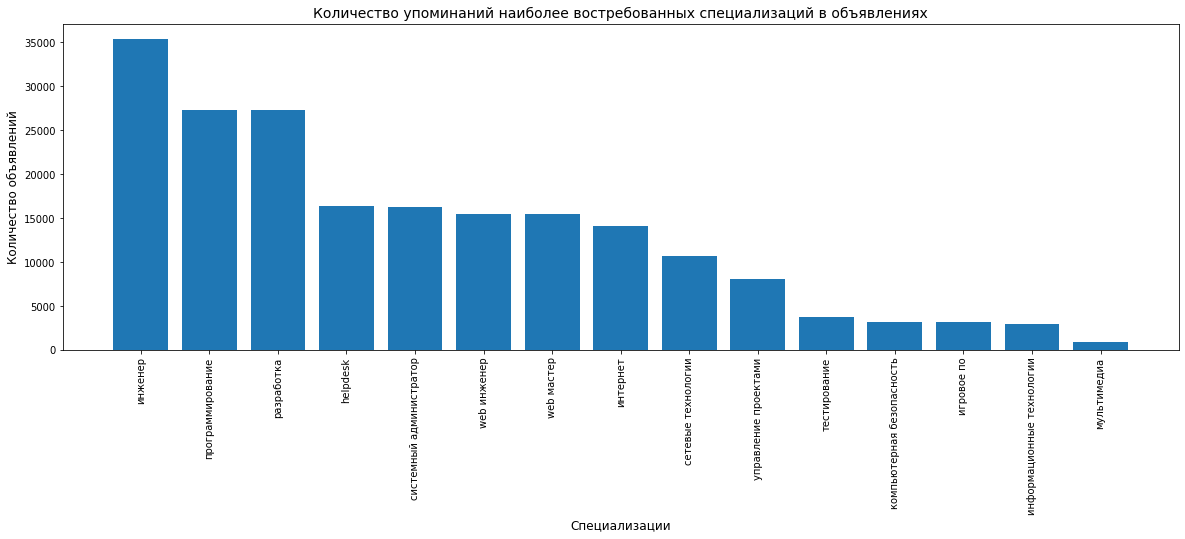

In [ ]:
# Строим диаграмму со специализациями
spec_count = spec['specializations_list'].value_counts()
fig = plt.figure(figsize = (20, 6))
plt.bar( spec_count.index.astype('str'), spec_count)

plt.title(label = "Количество упоминаний наиболее востребованных специализаций в объявлениях", fontsize = 14)
plt.ylabel("Количество объявлений",  fontsize = 12)
plt.xlabel( "Специализации", size = 12)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов

plt.show()

# Круговые диаграммы

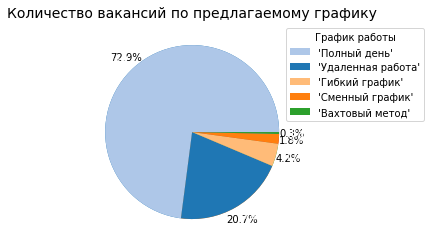

In [ ]:
schedule_count = dframe['schedule'].value_counts()

labels = dframe['schedule'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
plt.pie(schedule_count, autopct='%1.1f%%', pctdistance=1.15)
labels =schedule_count.index
plt.title(label = "Количество вакансий по предлагаемому графику", fontsize = 14)
patches, texts = plt.pie(
                    schedule_count.values,
                    labels = labels,
                    colors = [colors[key] for key in labels],
# при отрисовке графиков сохраняем результат работы в несколько переменных ‘patches’ и ‘texts’, понадобятся нам для отрисовки легенды.
                    textprops=dict(color="w")
# т.к. старые подписи нам стали не нужны, изменим их цвет на белый, чтобы они слились с фоном.
                    )
plt.legend(patches, labels, title="График работы", loc="upper center", bbox_to_anchor=(1, 0, 0.5, 1))
# создаём легенду с помощью команды .legend, подавая в неё patches, лейблы labels, полпись к нашей легенде title. loc и bbox_to_anchor – отвечают за положение легенды.
plt.show()

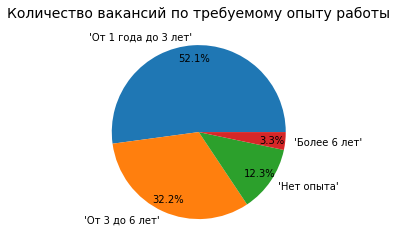

In [ ]:
experience_count = dframe['experience'].value_counts()

plt.pie(experience_count, labels = experience_count.index, autopct='%1.1f%%', pctdistance=0.85)
plt.title(label = "Количество вакансий по требуемому опыту работы", fontsize = 14)
plt.show()

# 4. Гипотеза о виде распределения для количественных показателей.

In [ ]:
dframe.drop(['city','schedule','experience','key_skills_list','specializations_list'],axis=1).describe()

,salary_from
count,20433.000000
mean,84319.039201
std,66558.150523
min,1.000000
25%,40000.000000
50%,62800.000000
75%,105000.000000
max,1000000.000000


## Критерий Шапиро-Уилка

> Работает с выборками до 5000 наблюдений


> Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05





В нашем случае - 49039 наблюдений. Но всё равно проверим:

In [ ]:
stats.shapiro(dframe['salary_from'].dropna())
# Т.к. p-value<0,05 нулевую гипотезу о том, что критерий соответствует генеральной совокупности, отвергаем. Выборка не принадлежит нормальной генеральной совокупности. Критерий значим.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.810200572013855, pvalue=0.0)

## Критерий асимметрии и эксцесса

> Коэффициент ассиметрии, у нормально распределенной выборки он равен 0 (возможны отклонения ±1)


> Коэффициент эксцесса, у нормально распределенной выборки он равен 3 (возможны отклонения ±1)





In [ ]:
dframe['salary_from'].skew()

2.236932394403877

Коэффициент асимметрии. Положительный, т.к. имеем сильное смещение графика влево относительно Гауссовского колокольчика, очень большой

In [ ]:
dframe['salary_from'].kurtosis()

9.25529562981705

Коэффициент Эксцесса. Положительный, т.к. график у нас островершинен. И намного больше 3

## Тест д'Агостино

> вычисляет итоговую статистику на основе данных, а именно, эксцесс и асимметрия, чтобы определить, отклоняется ли распределение данных от нормального распределения, названного по имени Ralph D’Agostino



In [ ]:
stats.normaltest(dframe['salary_from'].dropna())

NormaltestResult(statistic=10224.948602931467, pvalue=0.0)

**ВЫВОДЫ:** По всем трём вариантам вывод получается один и тот-же: Нулевую гипотезу о том, что критерий соответствует генеральной совокупности, отвергаем. Выборка не принадлежит нормальной генеральной совокупности, не подчиняется нормальному распределению. Критерий значим.

# 5. Оценить связь между показателями

> В зависимости от типов данных, оцените связь между показателями. Используйте:

*   Критерии сравнения групп для анализа связи количественных или порядковых показателей с категориальными.
*   Анализ таблиц сопряженности для оценки связи двух категориальных признаков.
*   Корреляционный анализ Пирсона или Спирмена для количественных или порядковых переменных.

## Критерии сравнения групп

> Анализ связи количественных или порядковых показателей с категориальными

Оценим средние Зарплаты по городам с максимальным количеством вакансий:

In [ ]:
top_city=cities[cities>=500].index
df_city=dframe.loc[dframe['city'].isin(top_city)]
df_city.groupby('city')[['salary_from']].mean().sort_values(by='salary_from',ascending = False)

,salary_from
city,
Москва,119021.574065
Санкт-Петербург,104077.120500
Новосибирск,100475.201405
Казань,91792.316940
...,...
Челябинск,73305.521053
Самара,71084.334262
Уфа,69577.204473
Красноярск,63339.604938


In [ ]:
df_city.groupby('city')[['salary_from']].count().sort_values(by='salary_from',ascending = False)

,salary_from
city,
Москва,4010
Санкт-Петербург,2000
Новосибирск,854
Екатеринбург,790
...,...
Воронеж,313
Уфа,313
Томск,297
Пермь,286


Сравниваем зарплаты по городам.
* Строим Боксплоты (Город/Зарплата):

(0.0, 370000.0, 14.5, -0.5)

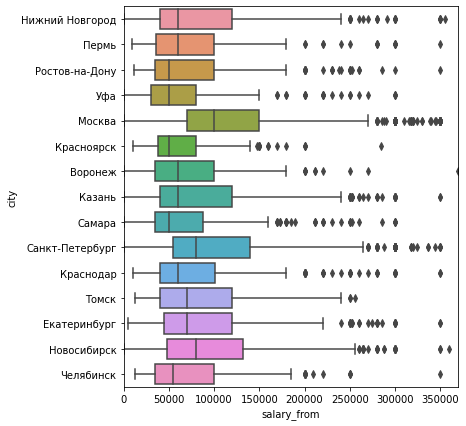

In [ ]:
f, ax = plt.subplots(figsize=(6, 7))
fig = sns.boxplot(x='salary_from', y='city', data=df_city)
plt.axis(xmin=0, xmax=370000) #Задаём лимиты по оси Х

Оценим средние Зарплаты по максимально востребованным навыкам на рынке труда:

In [ ]:
# Избавляемся от NaN в зарплате:
skills_not_nan=pd.notnull(skills['salary_from'])
skills_clean_salary=skills[skills_not_nan]

In [ ]:
# Выделяем наиболее значимые навыки, рассчитываем среднюю ЗП по каждому навыку, сортируем их по убыванию ЗП
top_skills=skill_count[skill_count>=1000].index
df_skills=skills_clean_salary.loc[skills_clean_salary['key_skills_list'].isin(top_skills)]
df_skills.groupby('key_skills_list')[['salary_from']].mean().sort_values(by='salary_from',ascending = False)

,salary_from
key_skills_list,
docker,166435.770751
java,158429.498476
postgresql,143068.800425
python,141576.761434
...,...
windows 7,49550.747801
настройка сетевых подключений,48773.455240
настройка по,46485.399752
настройка пк,46192.455021


In [ ]:
# Анализируем наиболее значимые навыки по количеству их упоминаний в вакансиях
df_skills.groupby('key_skills_list')[['salary_from']].count().sort_values(by='salary_from',ascending = False)

,salary_from
key_skills_list,
git,2020
linux,1670
sql,1580
javascript,1505
...,...
ms powerpoint,355
atlassian jira,353
тестирование,323
bash,230


Строим Боксплоты (Навыки/Зарплата):

(0.0, 450000.0, 37.5, -0.5)

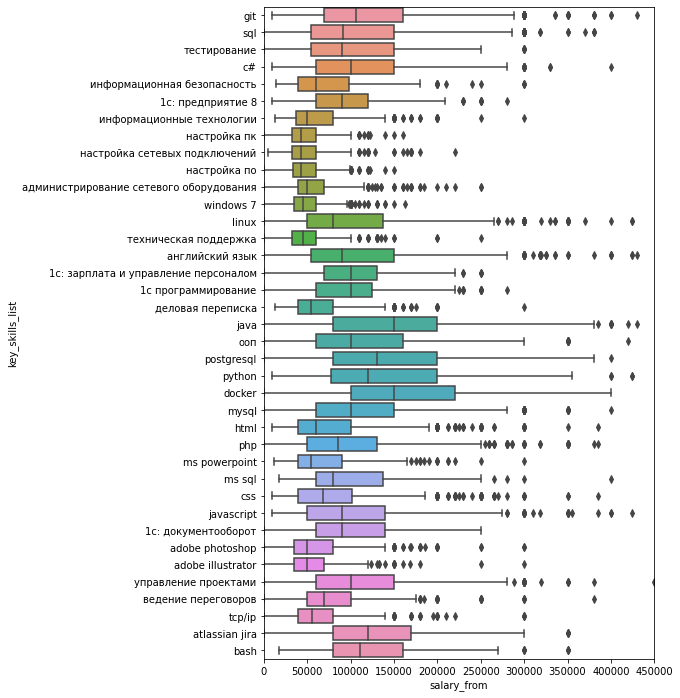

In [ ]:
f, ax = plt.subplots(figsize=(7, 12))
fig = sns.boxplot(x='salary_from', y='key_skills_list', data=df_skills)
plt.axis(xmin=0, xmax=450000) #Задаём лимиты по оси Х

Оценим средние Зарплаты по максимально востребованным специализациям на рынке труда:

In [ ]:
# Избавляемся от NaN в зарплате:
spec_not_nan=pd.notnull(spec['salary_from'])
spec_clean_salary=spec[spec_not_nan]

In [ ]:
# Рассчитываем среднюю ЗП по каждой специализации, сортируем их по убыванию ЗП
spec_clean_salary.groupby('specializations_list')[['salary_from']].mean().sort_values(by='salary_from',ascending = False)

,salary_from
specializations_list,
информационные технологии,141036.458950
мультимедиа,122574.677966
web мастер,111546.679056
web инженер,111543.463735
...,...
игровое по,62999.820531
интернет,56052.887798
системный администратор,55300.297922
helpdesk,54611.330996


In [ ]:
# Анализируем специализации по количеству их упоминаний в вакансиях
spec_clean_salary.groupby('specializations_list')[['salary_from']].count().sort_values(by='salary_from',ascending = False)

,salary_from
specializations_list,
инженер,15426
программирование,10971
разработка,10971
helpdesk,7843
...,...
компьютерная безопасность,1107
информационные технологии,743
тестирование,662
мультимедиа,295


Строим Боксплоты (Специализация/Зарплата):

(0.0, 450000.0, 14.5, -0.5)

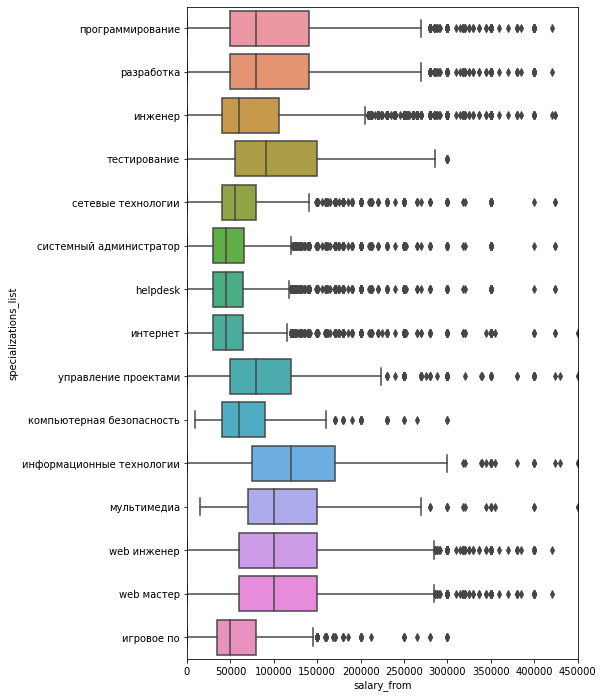

In [ ]:
f, ax = plt.subplots(figsize=(7, 12))
fig = sns.boxplot(x='salary_from', y='specializations_list', data=spec_clean_salary)
plt.axis(xmin=0, xmax=450000) #Задаём лимиты по оси Х

### Сравниваем график работы и заработную плату:

In [ ]:
dframe.groupby('schedule')[['salary_from']].mean() # оцениваем "среднее" зарплаты по вариантам рабочего графика

,salary_from
schedule,
'Вахтовый метод',124000.000000
'Гибкий график',98305.310705
'Полный день',80201.924251
'Сменный график',44886.940270
'Удаленная работа',99831.902365


In [ ]:
# Сравниваем количество объявлений по вариантам рабочего графика.
dframe.groupby('schedule')[['salary_from']].count()

,salary_from
schedule,
'Вахтовый метод',90
'Гибкий график',766
'Полный день',14746
'Сменный график',519
'Удаленная работа',4312


Рисуем боксплоты Зарплата/График, предварительно обработав данные от выбросов:

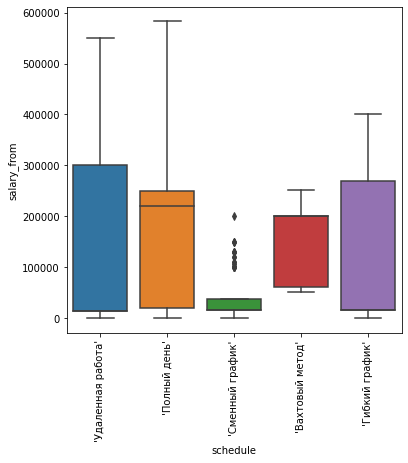

In [ ]:
dframe1 = dframe.drop(dframe.loc[(df['salary_from'] > 595000)].index)
list_schedule = dframe.schedule.unique()

for text in list_schedule:
  percentile3 = np.percentile(dframe1[dframe1['schedule'] == text]['salary_from'].dropna(), 3) # 3% процентиль
  percentile97 = np.percentile(dframe1[dframe1['schedule'] == text]['salary_from'].dropna(), 97) # 97% процентиль
  dframe1 = dframe1.drop(dframe1.loc[(dframe1['schedule'] == text) & (dframe1['salary_from'] > percentile3) & (dframe1['salary_from'] < percentile97)].index)

dframe2 = dframe1.drop(dframe1.loc[(dframe1['schedule'] == "'Вахтовый метод'") & (dframe1['salary_from'] > 495000)].index)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='schedule', y='salary_from', data = dframe2)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

Данные Количественны, Данные Не нормальные, Совокупностей более 2-х, Совокупности Независимы, Значит применяем метод Краскала-Уолиса

In [ ]:
dfd1=np.array(dframe2[dframe2['schedule']=="'Сменный график'"]['salary_from'])
dfd2=np.array(dframe2[dframe2['schedule']=="'Полный день'"]['salary_from'])
dfd3=np.array(dframe2[dframe2['schedule']=="'Гибкий график'"]['salary_from'])
dfd4=np.array(dframe2[dframe2['schedule']=="'Удаленная работа'"]['salary_from'])
dfd5=np.array(dframe2[dframe2['schedule']=="'Вахтовый метод'"]['salary_from'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4,dfd5)

KruskalResult(statistic=82.74397424429604, pvalue=4.5651296821451876e-17)

pvalue < 0.05, значит нулевая гипотеза отклоняется, критерий значим, на ЗП влияет сильно!

# Сравниваем опыт работы и заработную плату:

In [ ]:
dframe.groupby('experience')[['salary_from']].mean() # оцениваем "среднее" зарплаты по опыту работы

,salary_from
experience,
'Более 6 лет',175138.703297
'Нет опыта',36190.293527
'От 1 года до 3 лет',76003.396158
'От 3 до 6 лет',126036.864063


In [ ]:
# Сравниваем количество объявлений по требуемому опыту работы.
dframe.groupby('experience')[['salary_from']].count()

,salary_from
experience,
'Более 6 лет',546
'Нет опыта',3785
'От 1 года до 3 лет',10776
'От 3 до 6 лет',5326


Рисуем боксплоты Зарплата/Опыт, предварительно обработав данные от выбросов:

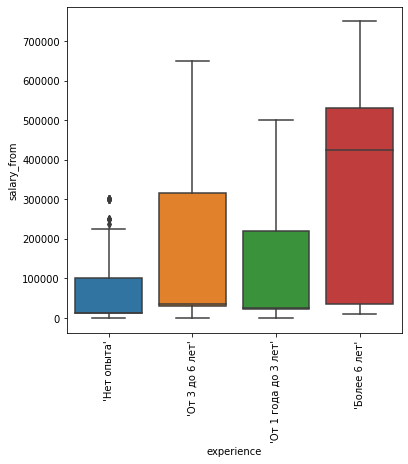

In [ ]:
dframe3=dframe
list_experience = dframe.experience.unique()

for text in list_experience:
  percentile3 = np.percentile(dframe3[dframe3['experience'] == text]['salary_from'].dropna(), 3) # 3% процентиль
  percentile97 = np.percentile(dframe3[dframe3['experience'] == text]['salary_from'].dropna(), 97) # 97% процентиль
  dframe3 = dframe3.drop(dframe3.loc[(dframe3['experience'] == text) & (dframe3['salary_from'] > percentile3) & (dframe3['salary_from'] < percentile97)].index)

dframe4 = dframe3.drop(dframe3.loc[(dframe3['experience'] == "'От 3 до 6 лет'") & (dframe3['salary_from'] > 900000)].index)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='experience', y='salary_from', data = dframe4)
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

Данные Количественны, Данные Не нормальные, Совокупностей более 2-х, Совокупности Независимы, Значит применяем метод Краскала-Уолиса

In [ ]:
dfo1=np.array(dframe4[dframe4['experience']=="'Нет опыта'"]['salary_from'])
dfo2=np.array(dframe4[dframe4['experience']=="'От 1 года до 3 лет'"]['salary_from'])
dfo3=np.array(dframe4[dframe4['experience']=="'От 3 до 6 лет'"]['salary_from'])
dfo4=np.array(dframe4[dframe4['experience']=="'Более 6 лет'"]['salary_from'])
stats.mstats.kruskalwallis(dfo1,dfo2,dfo3,dfo4)

KruskalResult(statistic=326.8290320229038, pvalue=1.5502458435536625e-70)

pvalue < 0.05, значит нулевая гипотеза отклоняется, критерий значим, на ЗП влияет сильно!

## Анализ таблиц сопряженности

> Оценки связи двух категориальных признаков

> Метод позволяет оценить статистическую значимость различий двух относительных показателей (частот, долей).







In [ ]:
wd=pd.crosstab(dframe['experience'],dframe['schedule']); wd

schedule,'Вахтовый метод','Гибкий график','Полный день','Сменный график','Удаленная работа'
experience,,,,,
'Более 6 лет',14,42,1296,3,263
'Нет опыта',9,257,3607,273,1901
'От 1 года до 3 лет',50,1162,19215,539,4600
'От 3 до 6 лет',98,608,11654,65,3383


Text(0, 0.5, 'Количество объявлений')

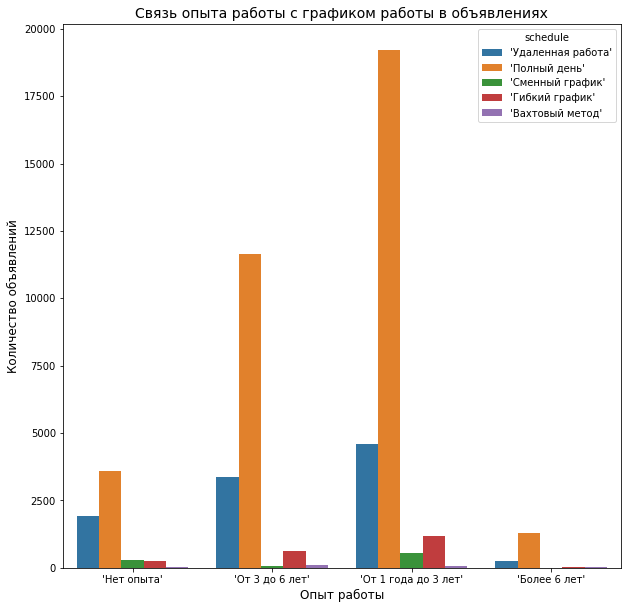

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.title(label = "Связь опыта работы с графиком работы в объявлениях", fontsize = 14)
c=sns.countplot(x=dframe['experience'], hue=dframe['schedule'])
c.set_xlabel("Опыт работы", size = 12)
c.set_ylabel("Количество объявлений",  fontsize = 12)

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

test Statistics: 1169.943455817406
degrees of freedom: 12
p-value: 5.131227358584599e-243



p-value < 0.05 Нулевую гипотезу отвергаем, показатели значимы. Значит, при построении модели регрессии, не нужно включать в неё оба этих параметра, а только какой-либо один.

## Корреляционный анализ Пирсона или Спирмена, Кендалла

> Для количественных или порядковых переменных



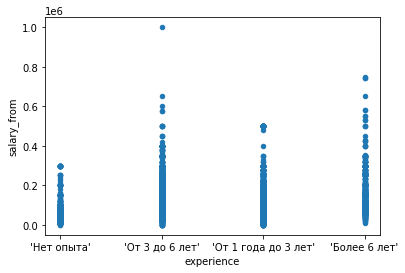

In [ ]:
dframe.plot('experience','salary_from',kind="scatter") # Строим диаграмму рассеяния - зависимость Зарплаты от Опыта.

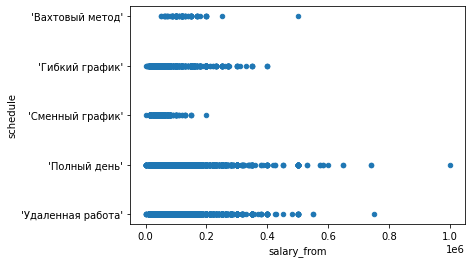

In [ ]:
dframe.plot('salary_from','schedule',kind="scatter") # Строим диаграмму рассеяния - зависимость Зарплаты от Графика.

Так как "Опыт" имеет всего 4 значения, а "график" - 5 значений, данные диаграммы рассеяния не очень наглядны.

In [ ]:
# Приведём столбцы Опыт и График - к числовому виду
def category_in_number(category):
  x=0
  for text in checklist:
    if text == category:
      result = x
    x+=1
  return result

checklist=["'Сменный график'", "'Вахтовый метод'", "'Полный день'",
       "'Гибкий график'", "'Удаленная работа'"]
dframe['schedule_number']=dframe.schedule.apply(category_in_number)
checklist=["'Нет опыта'", "'От 1 года до 3 лет'", "'От 3 до 6 лет'",
       "'Более 6 лет'"]
dframe['experience_number']=dframe.experience.apply(category_in_number)

In [ ]:
dframe[['salary_from','experience_number','schedule_number']].corr(method='spearman')

,salary_from,experience_number,schedule_number
salary_from,1.000000,0.594565,0.060513
experience_number,0.594565,1.000000,-0.024267
schedule_number,0.060513,-0.024267,1.000000


**Ранговая корреляция Спирмена**
Программа берёт все наши количественные показатели, каждый сортирует, меньшему присваивает 1-е значение и т.д. по порядку, делает это для каждого столбца, и сопоставляет их все.
Показывает степень тесноты между ранжировками.
- Зарплата с опытом работы 0,59 - хороший положительный коэффициент - ранги близки, связь сильная.
- Зарплата с графиком работы 0,06 - очень слабый положительный коэффициент - ранги практически отсутствуют, влияние слабое.
- Опыт работы с Графиком работы -0,02 - очень слабая противоположность рангов, друг на друга влияют очень слабо.

Визуализируем. Интенсивность цвета-степень связи параметров:

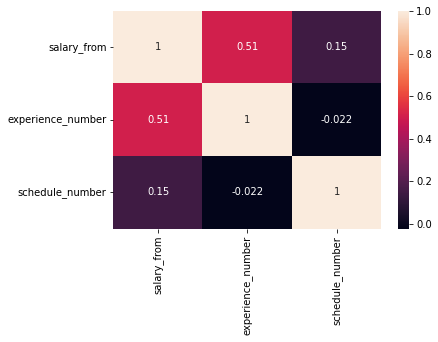

In [ ]:
num = ['salary_from','experience_number','schedule_number']
hm = sns.heatmap(dframe[num].corr(),annot=True)

Чтобы однозначно ответить-значима корреляция или нет, одного коррелляционного коэффициента мало. Нужно применить соответствующщий критерий (проверить гипотезу о незначимости коэффициента).
Рассчитаем парные коэффициенты для наших показателей:

In [ ]:
# Избавляемся от NaN в зарплате:
dframe_not_nan=pd.notnull(dframe['salary_from'])
dframe_clean_salary=dframe[dframe_not_nan]

In [ ]:
scipy.stats.spearmanr(dframe_clean_salary.salary_from, dframe_clean_salary.experience_number)

SpearmanrResult(correlation=0.5945653923675026, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(dframe_clean_salary.salary_from, dframe_clean_salary.schedule_number)

SpearmanrResult(correlation=0.06051292366193586, pvalue=4.8278705318960254e-18)

In [ ]:
scipy.stats.spearmanr(dframe.schedule_number, dframe.experience_number)

SpearmanrResult(correlation=-0.02426668040570009, pvalue=7.68166489391925e-08)

- Первая цифра - значение парного коррелляционного коэфициента;
- Вторая цифра - p-value для гипотезы о незначимости этого коэффициента (о равенстве его нулю)
- Все сделанные нами ранее выводы подтвердились

# 6. Регрессионная модель

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(23.125, 0.5, 'Начальная Заработная плата')

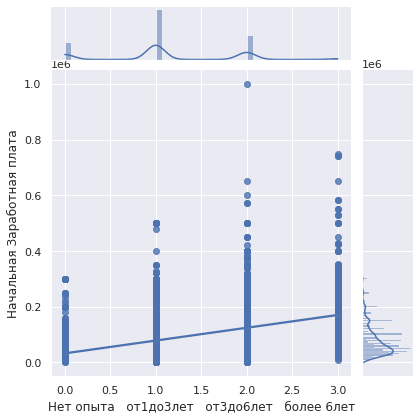

In [ ]:
# Диаграмма рассеяния
b=sns.set(style="darkgrid")
b=sns.jointplot('experience_number', 'salary_from', data=dframe_clean_salary, kind="reg")
b.ax_joint.set_xlabel('Нет опыта   от1до3лет   от3до6лет   более 6лет')
b.ax_joint.set_ylabel('Начальная Заработная плата')

- По графику видим, что есть выраженная зависимостьть Y от Х, также построен доверительный интервал + проекции остатков на каждую ось + гистограммы + оценка плотностей.
Конечно, линейная регрессия в данном случае не годится. Применим модель множественной регрессии

# Модель множественной регрессии OLS

In [ ]:
resultsm = smf.ols('salary_from ~ C(experience_number)', data=dframe_clean_salary).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            salary_from   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     2359.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:39:26   Log-Likelihood:            -2.5288e+05
No. Observations:               20433   AIC:                         5.058e+05
Df Residuals:                   20429   BIC:                         5.058e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.619e+04    932.436     38.813      0.000    3.44e+04     3.8e+04
C(experience_number)[T.1]  3.981e+04   1083.891     36.732      0.000    3.77e+04    4.19e+04
C(experience_number)[T.2]  8.985e+04   1219.555     73.672      0.000    8.75e+04    9.22e+04
C(experience_number)[T.3]  1.389e+05   2626.133     52.910      0.000    1.34e+05    1.44e+05
==============================================================================
Omnibus:                    11109.059   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148110.799
Skew:                           2.329   Prob(JB):                         0.00
Kurtosis:                      15.340   Cond. No.                         7.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Нас интересует R-squared(коэффициент Детерминации) = 25,7%; "Adj.R-squared"(скорректированный коэффициент Детерминации); F-statistic(статистика Фишера); Prob(F-statistic) = p-value = 0, очень надёжно отклоняем гипотезу о незначимости модели, наша модель статистически-значима; Intercept(своб.член) = 3.619e+04; std err(разброс знач-ий для своб.члена и "стоимости за единицу опытности"); t(статистики Стьюдента для проверки о незначимости); P>|t|(p-value для гипотезы о том, что параметры нам не нужны)-равны 0, гипотеза отклоняется; [0.025	0.975] - доверительные интервалы. Для анализа остатков: Jarque-Bera(JB)-критерий Жарка-Бера; Skew(коэффициент Асимметрии); Kurtosis(коэффициент Эксцесса без смещения); Prob(JB)-(p-value)=0 < 0,05 - Нулевую гипотезу отклоняем (шумы ненормально распределены); Durbin-Watson:(статистика Дарбина-Ватсона про некоррелированность наблюдений) = 1,413 - выборка наша пространственная, корреляции быть не должно

# 7. Формулируем гипотезу и проверяем её

**Статистическая гипотеза:**
Заработная плата не связана с графиком работы.

- Датасет у нас подготовлен (dframe_clean_salary - удалены строки с отсутствущей заработной платой), целевые данные для проверки гипотезы: salary_from (начальная заработная плата) и schedule_number (закодированный от 0 до 4 вариант графика работы)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(23.125, 0.5, 'Начальная Заработная плата')

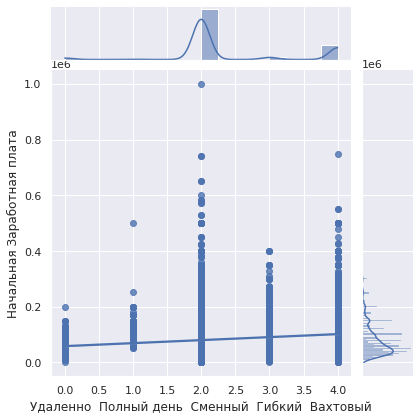

In [ ]:
# Диаграмма рассеяния
h=sns.set(style="darkgrid")
h=sns.jointplot('schedule_number', 'salary_from', data=dframe_clean_salary, kind="reg")
h.ax_joint.set_xlabel('Удаленно  Полный день  Сменный  Гибкий  Вахтовый')
h.ax_joint.set_ylabel('Начальная Заработная плата')

In [ ]:
# Проверяем гипотезу:
resultsm2 = smf.ols('salary_from ~ C(schedule_number)', data=dframe_clean_salary).fit()
resultsm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            salary_from   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     138.3
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          8.34e-117
Time:                        02:39:26   Log-Likelihood:            -2.5565e+05
No. Observations:               20433   AIC:                         5.113e+05
Df Residuals:                   20428   BIC:                         5.113e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4.489e+04   2883.093     15.569      0.000    3.92e+04    5.05e+04
C(schedule_number)[T.1]  7.911e+04   7499.738     10.549      0.000    6.44e+04    9.38e+04
C(schedule_number)[T.2]  3.531e+04   2933.391     12.039      0.000    2.96e+04    4.11e+04
C(schedule_number)[T.3]  5.342e+04   3734.185     14.305      0.000    4.61e+04    6.07e+04
C(schedule_number)[T.4]  5.494e+04   3051.672     18.005      0.000     4.9e+04    6.09e+04
==============================================================================
Omnibus:                    10006.636   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92430.423
Skew:                           2.156   Prob(JB):                         0.00
Kurtosis:                      12.485   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, что данный критерий значим (p-value везде <0.05), наша нулевая гипотеза отклоняется, график работы влияет на Заработную плату

# ВЫВОДЫ
График работы также влияет на уровень заработной платы, но по сравнению с опытом работы - в меньшей степени. Это наглядно видно в результате анализа таблиц сопряженности, по тепловым картам.

# Общие результаты проведённого анализа
И Опыт работы, и график работы - оказывают влияние на уровень заработной платы. Опыт - имеет сильное влияние, график - в меньшей степени.

Спасибо за представленное решение Рекомендации: Корреляционный анализ Пирсона или Спирмена проводится для количественных или порядковых переменных. У Вас зачет